# №1 </h1>
# 1.1 <h1>


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
sample_1 = np.random.normal(size=1000, loc=10, scale=40)

sample_1

sample_2 = np.random.normal(size=10, loc=1000, scale=40)

sample_2

array([ 939.12462023, 1027.00040606, 1090.95171575, 1001.0161268 ,
        989.12106003,  973.97626837,  971.7282896 , 1048.27656826,
        973.39990888,  975.65705685])

# 1.2 <h1>

Среднее выборочное:  18.4877189899866
Медиана:  8.182694086369803


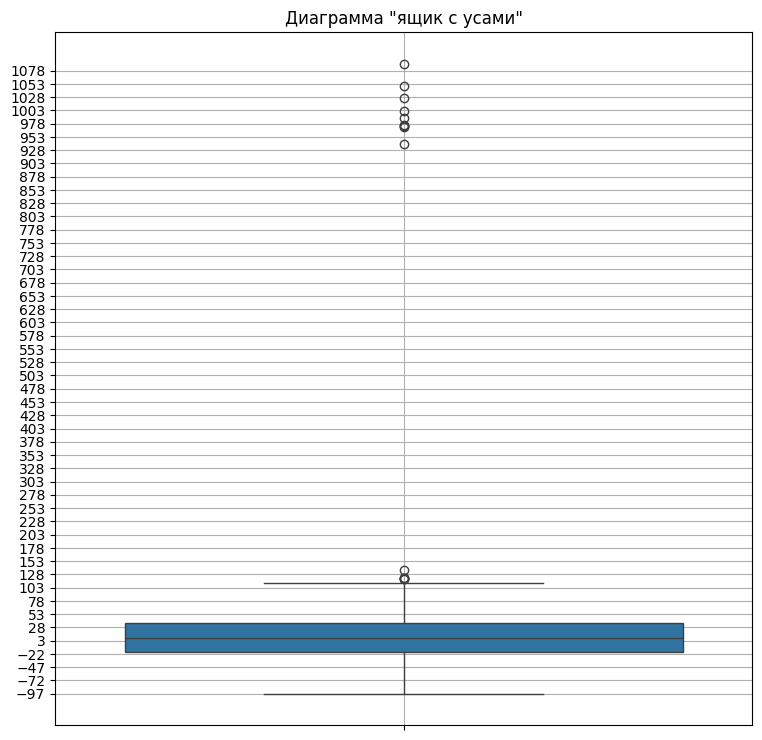

In [66]:
# Объединяем выборки
sample_concatenate = np.concatenate([np.array(sample_1), np.array(sample_2)])
# Среднее
sample_concatenate_mean = sample_concatenate.mean()
# Медиана
sample_concatenate_median = np.median(sample_concatenate)
print("Среднее выборочное: ", sample_concatenate_mean)
print("Медиана: ", sample_concatenate_median)

# Построение диаграммы "ящик с усами"
plt.figure(figsize=(9,9))
sns.boxplot(data=sample_concatenate)
plt.yticks(np.arange(min(sample_concatenate), max(sample_concatenate)+1, 25.0))
plt.title("Диаграмма \"ящик с усами\"")
plt.grid()

<h4> Исходя из диаграммы, можно сделать вывод, что более устойчива к выбросам выборка с большим количеством элементов</h4> 

# №2 </h1>
# 2.1 - 2.3 <h1>


1000 999 1.001001001001001
Дисперсия для выборки объема 1000: 99.84369560106171
Исправленная дисперсия для выборки объема 1000: 99.94363924030203
Диаграммы "Ящик с усами" для выборки объема 1000


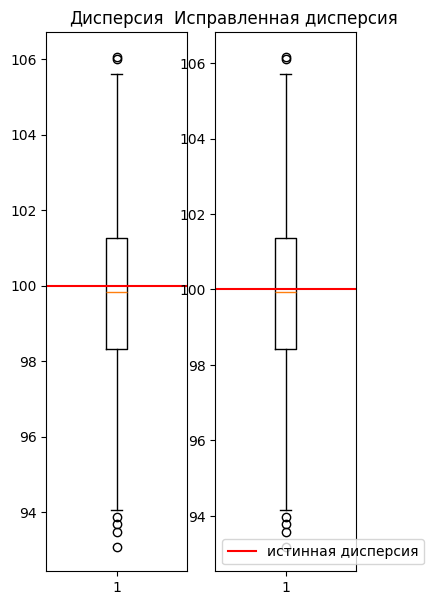

100 99 1.0101010101010102
Дисперсия для выборки объема 100: 99.29910384465063
Исправленная дисперсия для выборки объема 100: 100.3021250956067
Диаграммы "Ящик с усами" для выборки объема 100


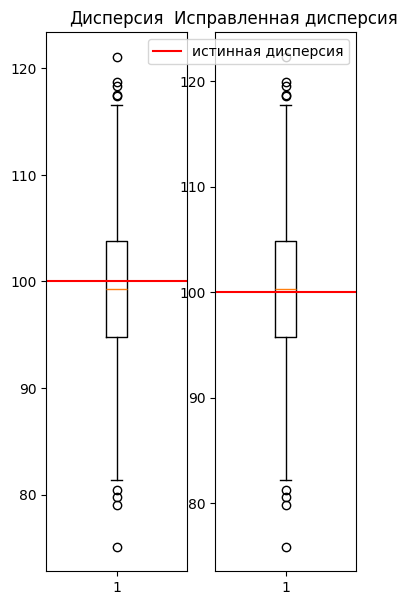

10 9 1.1111111111111112
Дисперсия для выборки объема 10: 91.77723776225316
Исправленная дисперсия для выборки объема 10: 101.97470862472574
Диаграммы "Ящик с усами" для выборки объема 10


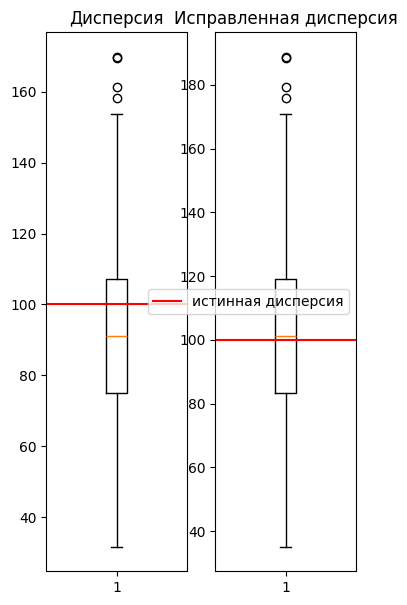

In [5]:
random_n = [1000, 100, 10]
corrected_stds = []
stds = []
standart_mean = 120
standart_std = 100

for j in range(3):
    n = random_n[j]
    std = []
    corrected_std = []
    cof = n/(n-1)

    print(n, n-1, n/(n-1))
    for i in range(1000):
        s = stats.norm(loc=standart_mean, scale=standart_std).rvs(size=n)
        std.append(s.std())
        corrected_std.append(s.std() * cof)

    corrected_stds.append(corrected_std)
    stds.append(std)
    print(f"Дисперсия для выборки объема {n}: {np.mean(np.array(stds[j]))}")
    print(f"Исправленная дисперсия для выборки объема {n}: {np.mean(np.array(corrected_stds[j]))}")

    print(f"Диаграммы \"Ящик с усами\" для выборки объема {n}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 7))

    axes[0].set_title("Дисперсия")
    axes[0].boxplot(x=std)
    axes[0].axhline(y=standart_std, color="red", label="истинная дисперсия")
    # axes[0].grid()

    axes[1].set_title("Исправленная дисперсия")
    axes[1].boxplot(x=corrected_std)
    axes[1].axhline(y=standart_std, color="red", label="истинная дисперсия")
    # axes[1].grid()

    plt.legend()
    plt.show()

# 2.3 </h1>

Заданное мат ожидание и дисперсия (120, 100)
Объем - 1000, заданное мат ожидание и выборочная дисперсия (120, 99.84369560106171)
Объем - 100, заданное мат ожидание и выборочная дисперсия (120, 99.29910384465063)
Объем - 10, заданное мат ожидание и выборочная дисперсия (120, 91.77723776225316)
Объем - 1000, заданное мат ожидание и исправленная выборочная дисперсия (120, 99.94363924030203)
Объем - 100, заданное мат ожидание и исправленная выборочная дисперсия (120, 100.3021250956067)
Объем - 10, заданное мат ожидание и исправленная выборочная дисперсия (120, 101.97470862472574)


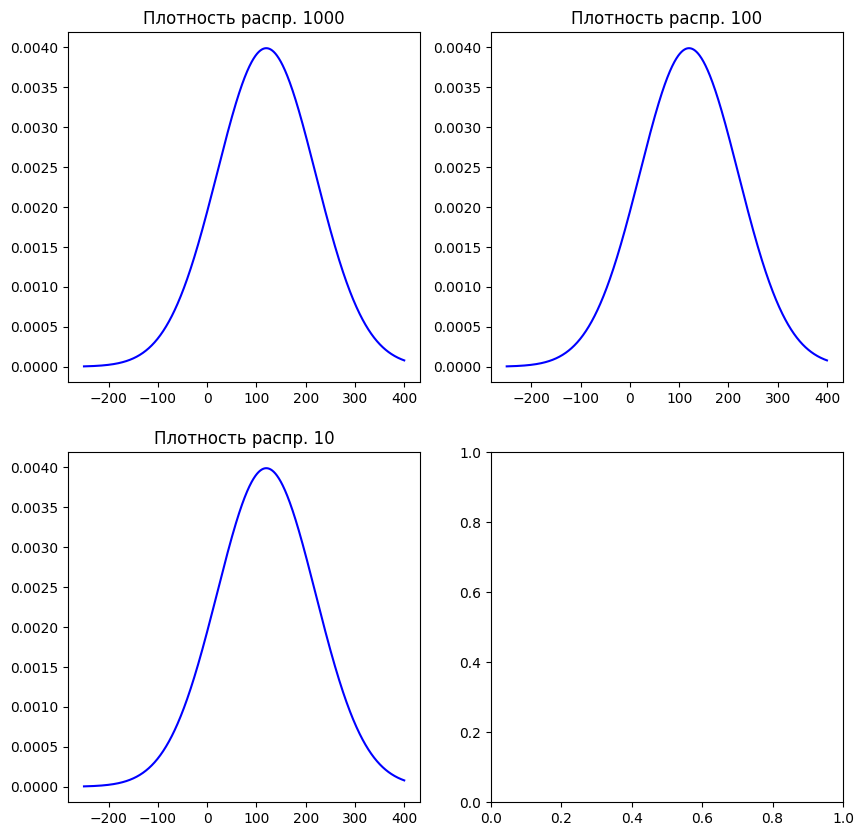

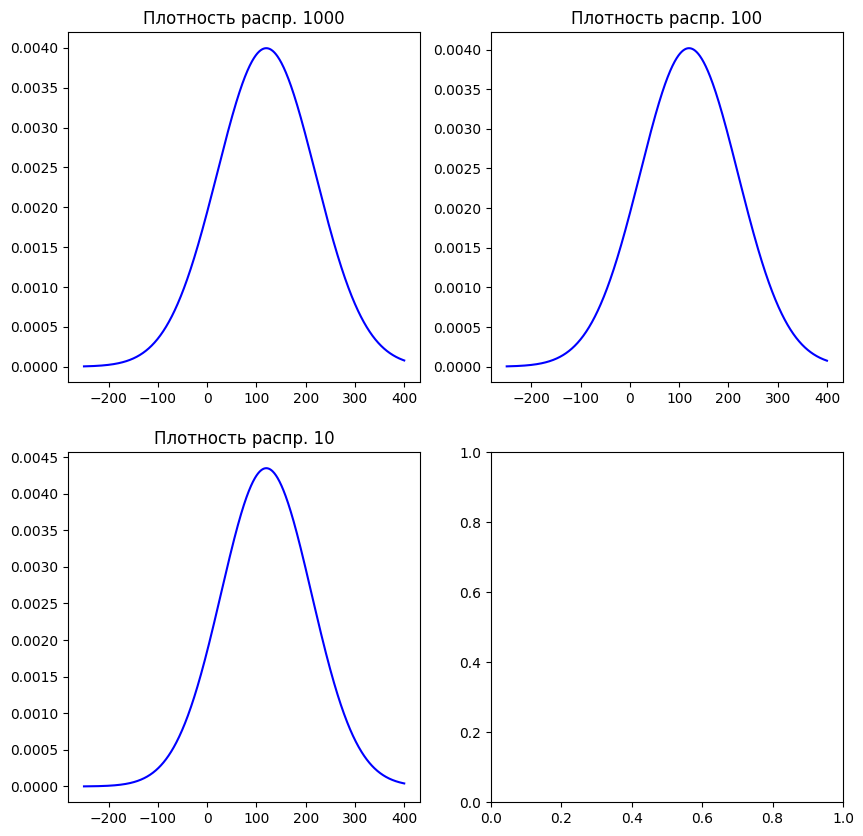

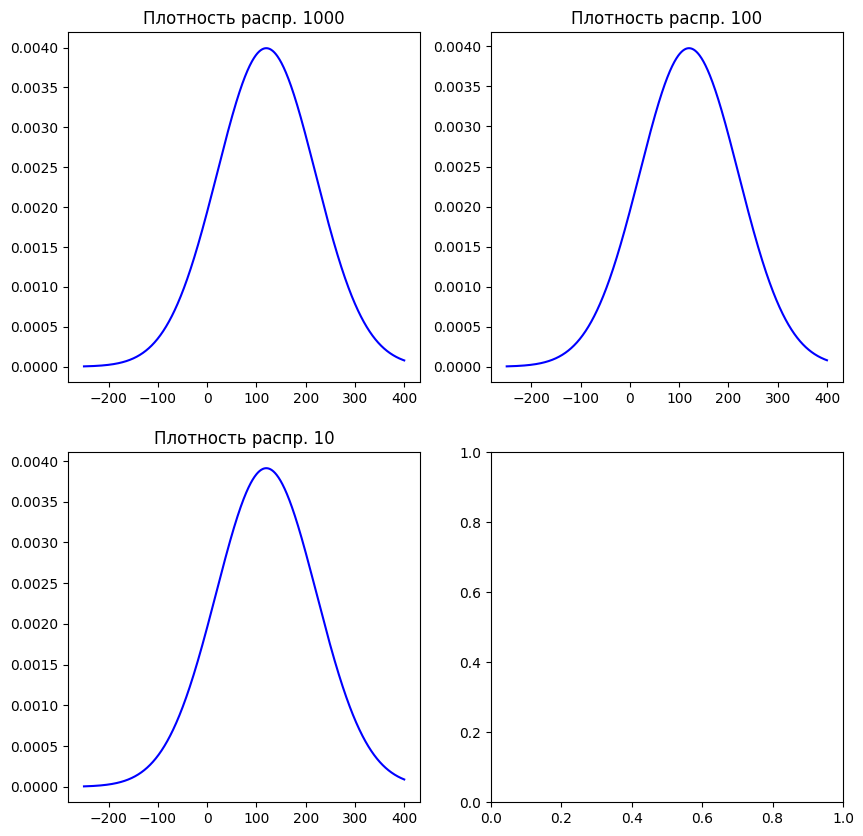

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
print(f"Заданное мат ожидание и дисперсия ({standart_mean}, {standart_std})")
for j in range(3):
    n = random_n[j]
    axes[j//2, j%2].set(title=f"Плотность распр. {n}")
    s = stats.norm(loc=standart_mean, scale=standart_std).rvs(size=n)
    # x=np.linspace(np.min(s), np.max(s), 1000)
    x=np.linspace(-250, 400, 1000)
    y = stats.norm.pdf(x, standart_mean, standart_std)
    axes[j//2, j%2].set_yticks(np.linspace(-0.0005, 0.0045, 11))
    axes[j//2, j%2].plot(x, y, color="blue")


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for j in range(3):
    n = random_n[j]
    print(f"Объем - {n}, заданное мат ожидание и выборочная дисперсия ({standart_mean}, {np.mean(np.array(stds[j]))})")
    axes[j//2, j%2].set(title=f"Плотность распр. {n}")
    s = stats.norm(loc=standart_mean, scale=np.mean(np.array(stds[j]))).rvs(size=n)
    # x=np.linspace(np.min(s), np.max(s), 1000)
    x=np.linspace(-250, 400, 1000)
    y = stats.norm.pdf(x, standart_mean, np.mean(np.array(stds[j])))
    axes[j//2, j%2].set_yticks(np.linspace(-0.0005, 0.0045, 11))
    axes[j//2, j%2].plot(x, y, color="blue")


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for j in range(3):
    n = random_n[j]
    print(f"Объем - {n}, заданное мат ожидание и исправленная выборочная дисперсия ({standart_mean}, {np.mean(np.array(corrected_stds[j]))})")
    axes[j//2, j%2].set(title=f"Плотность распр. {n}")
    s = stats.norm(loc=standart_mean, scale=np.mean(np.array(corrected_stds[j]))).rvs(size=n)
    # x=np.linspace(np.min(s), np.max(s), 1000)
    x=np.linspace(-250, 400, 1000)
    y = stats.norm.pdf(x, standart_mean, np.mean(np.array(corrected_stds[j])))
    axes[j//2, j%2].set_yticks(np.linspace(-0.0005, 0.0045, 11))
    axes[j//2, j%2].plot(x, y, color="blue")

# Наименьшее отклонение от истинных значений дисперсии у графиков с большим объемом выборки. </h4>

# Задание 3 </h3>

In [9]:
n_values = [10, 100, 1000]
for j in range(3):
    n = n_values[j]
    s = stats.norm(loc=200, scale=50).rvs(size=n)
    mean = np.mean(s) # мат ожидание
    sigma_of_mean = stats.sem(s) # стандартное отклонение выборочного среднего
    interval_mean = stats.norm.interval(0.95, loc=mean, scale= sigma_of_mean)

    print("--" * 3)
    print(f'*Размер выборки - {n}*')
    print(f'Математическое ожидание - {mean}')
    print(f'Стандартное отклонение выборочной средней - {sigma_of_mean}')
    print('Математическое ожидание принадлежит интервалу [{:4.2f}; {:4.2f}]'.format(interval_mean[0],interval_mean[1]))
    print(f'Величина интервала - {interval_mean[1] - interval_mean[0]}')

------
*Размер выборки - 10*
Математическое ожидание - 180.89918608075237
Стандартное отклонение выборочной средней - 16.18081066818345
Математическое ожидание принадлежит интервалу [149.19; 212.61]
Величина интервала - 63.42761230060211
------
*Размер выборки - 100*
Математическое ожидание - 206.00958292982784
Стандартное отклонение выборочной средней - 5.376063351838494
Математическое ожидание принадлежит интервалу [195.47; 216.55]
Величина интервала - 21.07378109641826
------
*Размер выборки - 1000*
Математическое ожидание - 201.71797102929142
Стандартное отклонение выборочной средней - 1.661105879259834
Математическое ожидание принадлежит интервалу [198.46; 204.97]
Величина интервала - 6.511415395714039


# при увеличении объема выборки величина доверительного интервала уменьшается </h3>

In [8]:
sigma_values = [10, 50, 200]
for j in range(3):
    sigma = sigma_values[j]
    s = stats.norm(loc=200, scale= sigma).rvs(size=1000)
    mean = np.mean(s) # мат ожидание
    sigma_of_mean = stats.sem(s) # стандартное отклонение выборочного среднего
    interval_mean = stats.norm.interval(0.95, loc=mean, scale= sigma_of_mean)

    print("--" * 3)
    print(f'*Дисперсия - {sigma}*')
    print(f'Математическое ожидание - {mean}')
    print(f'Стандартное отклонение выборочной средней - {sigma_of_mean}')
    print('Математическое ожидание принадлежит интервалу [{:4.2f}; {:4.2f}]'.format(interval_mean[0],interval_mean[1]))
    print(f'Величина интервала - {interval_mean[1] - interval_mean[0]}')

------
*Дисперсия - 10*
Математическое ожидание - 200.4440689674676
Стандартное отклонение выборочной средней - 0.32321150212392663
Математическое ожидание принадлежит интервалу [199.81; 201.08]
Величина интервала - 1.2669658071039862
------
*Дисперсия - 50*
Математическое ожидание - 198.6467850182709
Стандартное отклонение выборочной средней - 1.5791205482918986
Математическое ожидание принадлежит интервалу [195.55; 201.74]
Величина интервала - 6.190038803798529
------
*Дисперсия - 200*
Математическое ожидание - 195.18036483576287
Стандартное отклонение выборочной средней - 6.408499566993821
Математическое ожидание принадлежит интервалу [182.62; 207.74]
Величина интервала - 25.12085669249683


# при увеличении дисперсии, величина доверительного интервала увеличивается</h3>

In [7]:
alpha_values = [0.90, 0.95, 0.99, 0.999]
for j in range(4):
    alpha = alpha_values[j]
    s = stats.norm(loc=200, scale=50).rvs(size=1000)
    mean = np.mean(s) # мат ожидание
    sigma_of_mean = stats.sem(s) # стандартное отклонение выборочного среднего
    interval_mean = stats.norm.interval(alpha, loc=mean, scale= sigma_of_mean)

    print("--" * 3)
    print(f'*Уровень доверия - {alpha}*')
    print(f'Математическое ожидание - {mean}')
    print(f'Стандартное отклонение выборочной средней - {sigma_of_mean}')
    print('Математическое ожидание принадлежит интервалу [{:4.2f}; {:4.2f}]'.format(interval_mean[0],interval_mean[1]))
    print(f'Величина интервала - {interval_mean[1] - interval_mean[0]}')

------
*Уровень доверия - 0.9*
Математическое ожидание - 201.48296849383058
Стандартное отклонение выборочной средней - 1.5646480088521562
Математическое ожидание принадлежит интервалу [198.91; 204.06]
Величина интервала - 5.147233904525763
------
*Уровень доверия - 0.95*
Математическое ожидание - 200.14691404339436
Стандартное отклонение выборочной средней - 1.5534646938391958
Математическое ожидание принадлежит интервалу [197.10; 203.19]
Величина интервала - 6.089469702358713
------
*Уровень доверия - 0.99*
Математическое ожидание - 201.0340654034163
Стандартное отклонение выборочной средней - 1.5527110162314401
Математическое ожидание принадлежит интервалу [197.03; 205.03]
Величина интервала - 7.999037071104283
------
*Уровень доверия - 0.999*
Математическое ожидание - 201.4505732740679
Стандартное отклонение выборочной средней - 1.6195872704262004
Математическое ожидание принадлежит интервалу [196.12; 206.78]
Величина интервала - 10.658590414642845


# при увеличении уровня доверия, величина доверительного интервала увеличивается</h3>

In [1]:
means = []
samples = []
stds = [] 
for i in range(1000):
    sample = stats.norm(loc=70, scale=50).rvs(size=50)
    means.append(sample.mean())
    stds.append(sample.std())
interval = stats.norm.interval(0.95, loc=np.mean(np.array(means)), scale=np.mean(np.array(stds)))
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(means)), np.mean(np.array(stds)))
sns.lineplot(x=x, y=y)
plt.title("интервал для выборки объемом 50")
plt.show()

NameError: name 'stats' is not defined

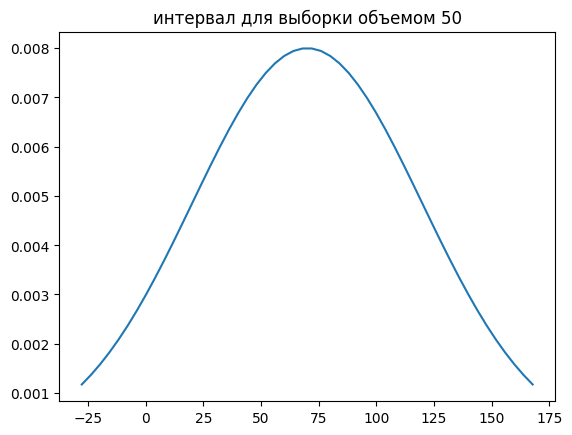

In [ ]:
means = []
samples = []
stds = [] 
for i in range(1000):
    sample = stats.norm(loc=70, scale=50).rvs(size=500)
    means.append(sample.mean())
    stds.append(sample.std())
interval = stats.norm.interval(0.95, loc=np.mean(np.array(means)), scale=np.mean(np.array(stds)))
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(means)), np.mean(np.array(stds)))
sns.lineplot(x=x, y=y)
plt.title("интервал для выборки объемом 50")
plt.show()

(-3.3459234298127996, 104.73031607561379)


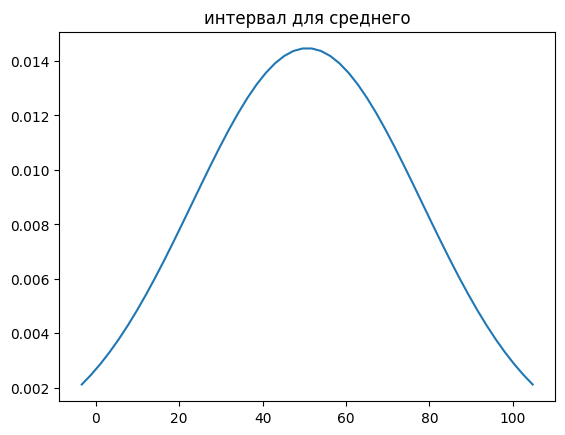

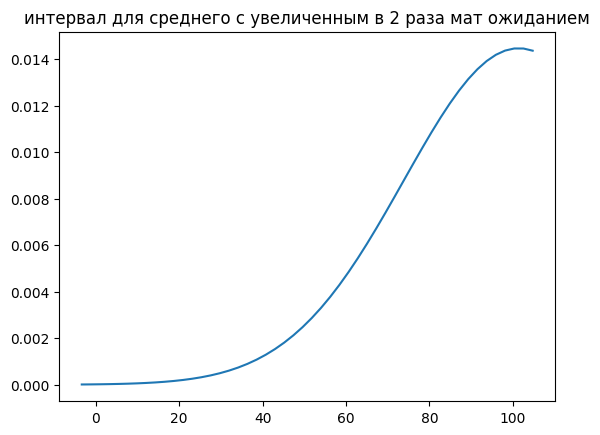

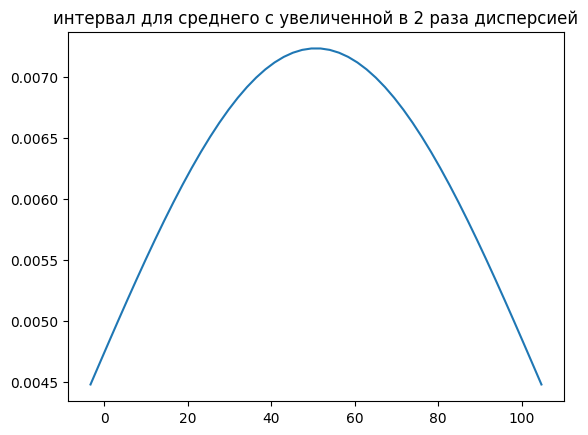

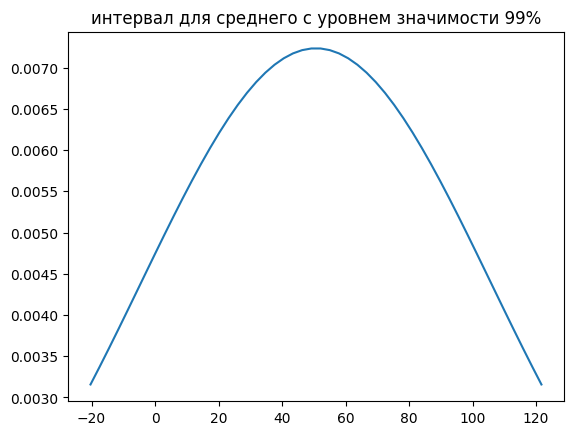

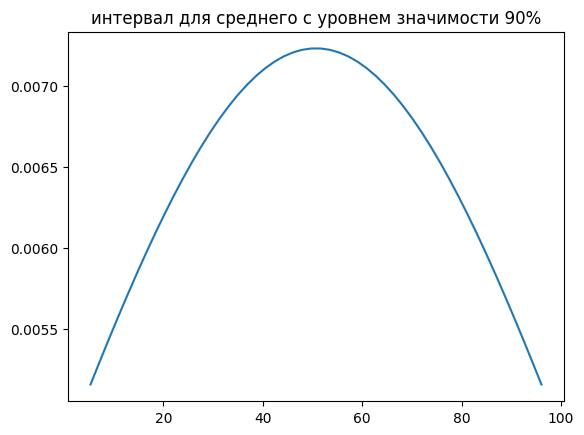

In [ ]:
sample = stats.norm(loc=50, scale=30).rvs(size=50)

interval = stats.norm.interval(0.95, loc=sample.mean(), scale=sample.std())
print(interval)
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(sample)), np.std(np.array(sample)))
sns.lineplot(x=x, y=y)
plt.title("интервал для среднего")
plt.show()

interval = stats.norm.interval(0.95, loc=sample.mean(), scale=sample.std())
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(sample)) * 2, np.std(np.array(sample)))
sns.lineplot(x=x, y=y)
plt.title("интервал для среднего c увеличенным в 2 раза мат ожиданием")
plt.show()

interval = stats.norm.interval(0.95, loc=sample.mean(), scale=sample.std())
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(sample)), np.std(np.array(sample)) * 2)
sns.lineplot(x=x, y=y)
plt.title("интервал для среднего c увеличенной в 2 раза дисперсией")
plt.show()

interval = stats.norm.interval(0.99, loc=sample.mean(), scale=sample.std())
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(sample)), np.std(np.array(sample)) * 2)
sns.lineplot(x=x, y=y)
plt.title("интервал для среднего c уровнем значимости 99%")
plt.show()

interval = stats.norm.interval(0.90, loc=sample.mean(), scale=sample.std())
x=np.linspace(min(interval), max(interval), 50)
y = stats.norm.pdf(x, np.mean(np.array(sample)), np.std(np.array(sample)) * 2)
sns.lineplot(x=x, y=y)
plt.title("интервал для среднего c уровнем значимости 90%")
plt.show()